In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
try:
    df = pd.read_csv('C:\\Users\\Administrator\\Desktop\\excel\\btc-eth-prices.csv')
    print(df.head())
except FileNotFoundError:
    print("The file 'C:\\Users\\Administrator\\Desktop\\excel\\btc-eth-prices.csv' was not found. Please check the file path and try again.")

    Timestamp      Bitcoin  Ether
0  2017-04-02  1099.169125  48.55
1  2017-04-03  1141.813000  44.13
2  2017-04-04  1141.600363  44.43
3  2017-04-05  1133.079314  44.90
4  2017-04-06  1196.307937  43.23


In [2]:
df.describe()

,Bitcoin,Ether
count,365.000000,362.000000
mean,9484.697529,506.203757
std,44457.245303,1112.117333
min,1099.169125,42.310000
25%,2599.729838,241.945000
50%,4641.822017,309.730000
75%,9696.593333,683.777500
max,787116.195000,20089.420000


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Timestamp  365 non-null    object 
 1   Bitcoin    365 non-null    float64
 2   Ether      362 non-null    float64
dtypes: float64(2), object(1)
memory usage: 8.7+ KB


# checking for nulls and duplicates

In [4]:
df.isnull().sum()

Timestamp    0
Bitcoin      0
Ether        3
dtype: int64

In [5]:
df.duplicated()


0      False
1      False
2      False
3      False
4      False
       ...  
360    False
361    False
362    False
363    False
364    False
Length: 365, dtype: bool

In [6]:
df['Ether'].mean()

np.float64(506.2037569060774)

# Cleaning the nulls

In [7]:
df.fillna(df['Ether'].mean(), inplace = True)

In [8]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Timestamp  365 non-null    object 
 1   Bitcoin    365 non-null    float64
 2   Ether      365 non-null    float64
dtypes: float64(2), object(1)
memory usage: 8.7+ KB


Timestamp    0
Bitcoin      0
Ether        0
dtype: int64

In [9]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df


,Timestamp,Bitcoin,Ether
0,2017-04-02,1099.169125,48.55
1,2017-04-03,1141.813000,44.13
2,2017-04-04,1141.600363,44.43
3,2017-04-05,1133.079314,44.90
4,2017-04-06,1196.307937,43.23
...,...,...,...
360,2018-03-28,7960.380000,445.93
361,2018-03-29,7172.280000,383.90
362,2018-03-30,6882.531667,393.82
363,2018-03-31,6935.480000,394.07


In [11]:
correlation = df[['Bitcoin', 'Ether']].corr()
correlation

,Bitcoin,Ether
Bitcoin,1.000000,0.013735
Ether,0.013735,1.000000


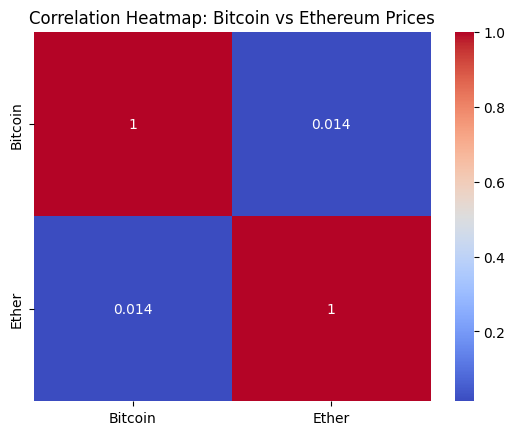

In [12]:
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap: Bitcoin vs Ethereum Prices')
plt.show()


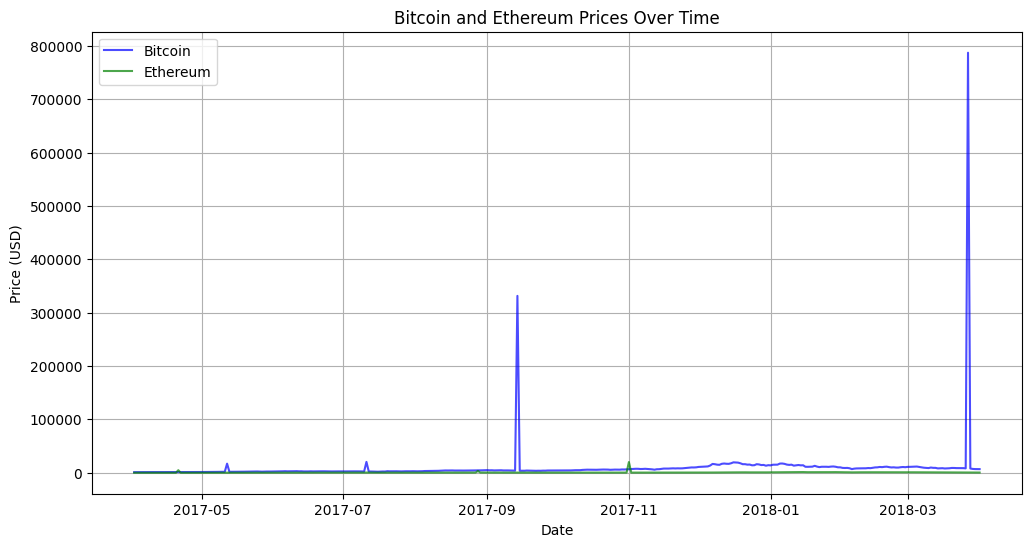

In [13]:

plt.figure(figsize=(12, 6))
plt.plot(df['Timestamp'], df['Bitcoin'], label='Bitcoin', color='blue', alpha=0.7)
plt.plot(df['Timestamp'], df['Ether'], label='Ethereum', color='green', alpha=0.7)
plt.title('Bitcoin and Ethereum Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()



## It seems that we have some overpriced values



In [14]:

# Step 1: Detect outliers using IQR method
Q1 = df[['Bitcoin', 'Ether']].quantile(0.25)
Q3 = df[['Bitcoin', 'Ether']].quantile(0.75)
IQR = Q3 - Q1




In [15]:
# Define lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [16]:
outliers_bitcoin = ((df['Bitcoin'] < lower_bound['Bitcoin']) | (df['Bitcoin'] > upper_bound['Bitcoin']))
outliers_ether = ((df['Ether'] < lower_bound['Ether']) | (df['Ether'] > upper_bound['Ether']))

In [17]:
df[outliers_bitcoin]


,Timestamp,Bitcoin,Ether
100,2017-07-11,20369.862129,190.55
165,2017-09-14,331449.630000,223.14
359,2018-03-27,787116.195000,448.78


In [18]:
df[outliers_ether]

,Timestamp,Bitcoin,Ether
19,2017-04-21,1258.361412,4800.27
148,2017-08-28,4391.673517,3407.66
213,2017-11-01,6665.306683,20089.42
286,2018-01-13,14499.773333,1385.02
287,2018-01-14,13852.920000,1359.48


In [19]:
# Step 2: Replace outliers with the median value (optional)
df.loc[outliers_bitcoin, 'Bitcoin'] = df['Bitcoin'].median()
df.loc[outliers_ether, 'Ether'] = df['Ether'].median()


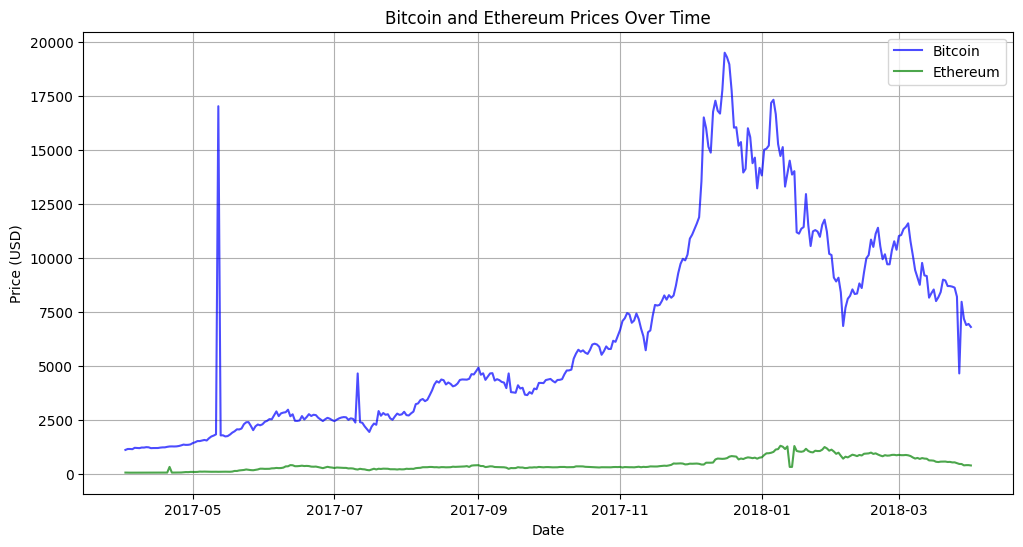

In [20]:
# Compare both prices over time
plt.figure(figsize=(12, 6))
plt.plot(df['Timestamp'], df['Bitcoin'], label='Bitcoin', color='blue', alpha=0.7)
plt.plot(df['Timestamp'], df['Ether'], label='Ethereum', color='green', alpha=0.7)
plt.title('Bitcoin and Ethereum Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

            Bitcoin        Ether
Month                           
1      13047.251301  1023.312258
2       9418.720264   867.773214
3       8924.557645   623.924516
4       1411.733771    70.158667
5       2374.960410   123.182903
6       2621.314839   304.448333
7       2590.054716   220.562903
8       3889.113340   299.881613
9       4173.883084   296.973333
10      5332.258253   305.404194
11      7792.848741   356.618333
12     15234.926801   633.899718


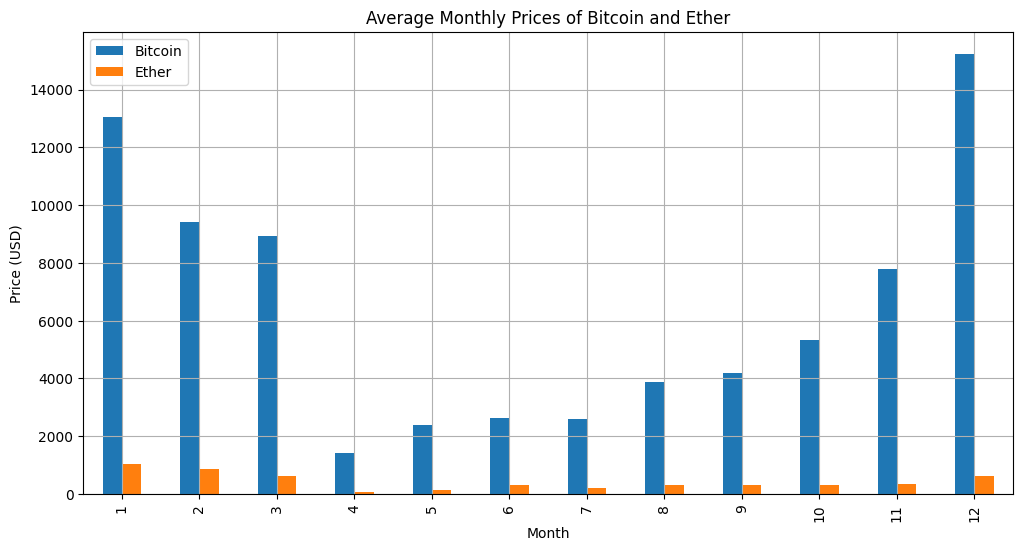

In [21]:
# Group by month to find average prices
df['Month'] = df['Timestamp'].dt.month
monthly_avg = df.groupby('Month')[['Bitcoin', 'Ether']].mean()
print(monthly_avg)

# Plot monthly averages
monthly_avg.plot(kind='bar', figsize=(12, 6))
plt.title('Average Monthly Prices of Bitcoin and Ether')
plt.xlabel('Month')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

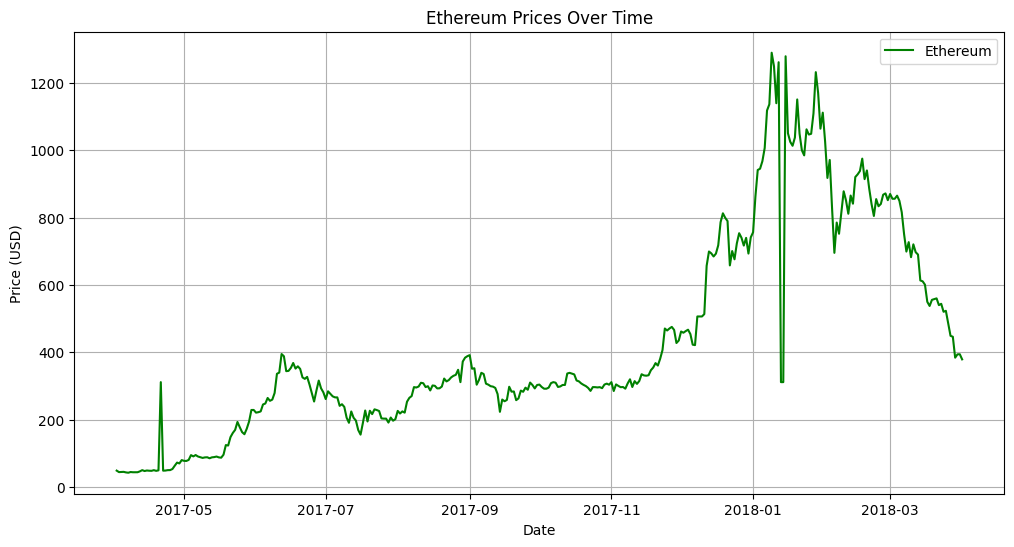

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(df['Timestamp'], df['Ether'], label='Ethereum', color='green')
plt.title('Ethereum Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

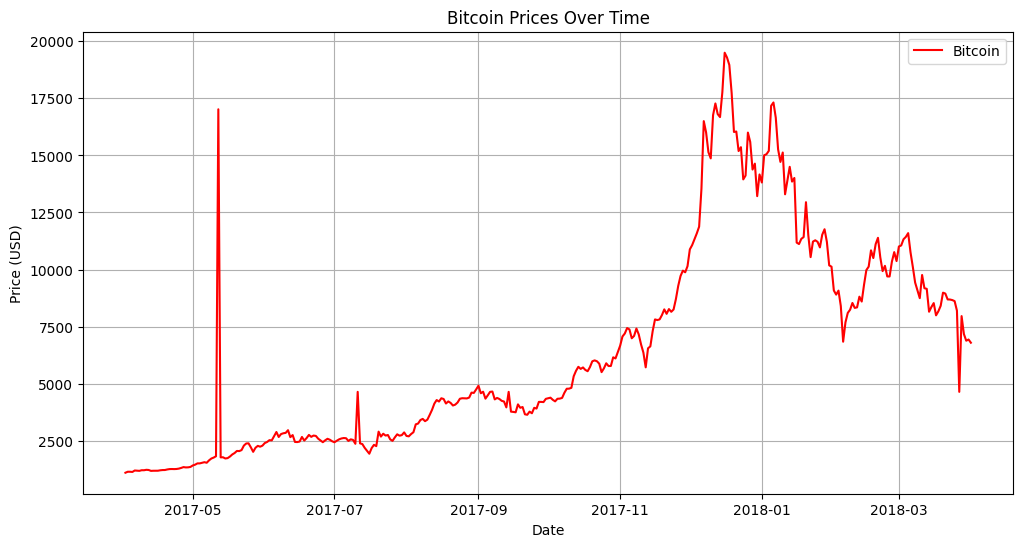

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(df['Timestamp'], df['Bitcoin'], label='Bitcoin', color='red')
plt.title('Bitcoin Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()